In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import seaborn as sns

from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

from lightgbm import LGBMClassifier

plt.style.use("../KD_style.mplstyle")


In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        df = pd.DataFrame(f[name][:], dtype=np.float64)
        df = df.drop("index", axis = 1)
        return df

train = load_data('./train')
display(train)
print(train.iloc[50686])
train = train.sample(frac=1, random_state= 42)
display(train)
final_test  = load_data('./test')


,eventNumber,runNumber,actualInteractionsPerCrossing,averageInteractionsPerCrossing,correctedActualMu,correctedAverageMu,correctedScaledActualMu,correctedScaledAverageMu,NvtxReco,p_nTracks,...,p_E5x7_Lr0,p_E5x7_Lr1,p_E5x7_Lr2,p_E5x7_Lr3,p_E7x11_Lr0,p_E7x11_Lr1,p_E7x11_Lr2,p_E7x11_Lr3,p_E7x7_Lr0,p_E7x7_Lr1
0,87834187.0,300000.0,26.500000,26.500000,26.500000,26.500000,26.500000,26.500000,18.0,3.0,...,215.588013,43402.332031,74045.820312,337.980713,273.708801,43091.683594,74447.539062,470.177124,273.708801,43091.683594
1,84862668.0,300000.0,35.500000,35.500000,35.500000,35.500000,35.500000,35.500000,23.0,4.0,...,10502.792969,36774.925781,58228.847656,412.321869,10861.282227,37433.324219,61805.964844,460.203613,10861.282227,37433.324219
2,20869557.0,300000.0,29.490000,29.490000,29.490000,29.490000,29.490000,29.490000,20.0,3.0,...,5307.428711,23413.427734,38875.042969,3492.513672,5705.863281,23728.701172,40497.234375,3333.052734,5705.863281,23728.701172
3,42161877.0,300000.0,37.500000,37.500000,37.500000,37.500000,37.500000,37.500000,17.0,2.0,...,0.000000,27372.955078,104002.000000,921.178040,0.000000,27101.673828,106995.789062,1127.115356,0.000000,27101.673828
4,82761614.0,300000.0,59.500000,59.500000,59.500000,59.500000,59.500000,59.500000,33.0,7.0,...,0.000000,45745.859375,87924.406250,-75.167221,0.000000,45947.109375,93710.968750,-188.182098,0.000000,45947.109375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162495,87753440.0,300000.0,59.500000,59.500000,59.500000,59.500000,59.500000,59.500000,34.0,2.0,...,1064.037109,35473.875000,86889.070312,867.511475,1120.453857,36521.750000,88872.992188,748.347656,1120.453857,36521.750000
162496,7746045.0,300000.0,11.490000,11.490000,11.490000,11.490000,11.490000,11.490000,10.0,4.0,...,0.000000,36722.617188,79933.289062,352.093262,0.000000,36812.964844,83049.414062,665.589417,0.000000,36800.929688
162497,85994391.0,300000.0,44.490002,44.490002,44.490002,44.490002,44.490002,44.490002,28.0,5.0,...,7650.331543,26506.359375,52808.492188,287.444580,7824.405273,26847.457031,53551.433594,-13.175649,7824.405273,26847.457031
162498,9886827.0,300000.0,20.490000,20.490000,20.490000,20.490000,20.490000,20.490000,14.0,1.0,...,0.000000,46398.742188,134187.593750,1426.328613,0.000000,46656.253906,137266.218750,1512.928101,0.000000,46656.253906


eventNumber                       9.444063e+07
runNumber                         3.000000e+05
actualInteractionsPerCrossing     3.750000e+01
averageInteractionsPerCrossing    3.750000e+01
correctedActualMu                 3.750000e+01
                                      ...     
p_E7x11_Lr1                       3.391229e+04
p_E7x11_Lr2                       7.265338e+04
p_E7x11_Lr3                       1.795169e+03
p_E7x7_Lr0                        0.000000e+00
p_E7x7_Lr1                        3.391229e+04
Name: 50686, Length: 165, dtype: float64


,eventNumber,runNumber,actualInteractionsPerCrossing,averageInteractionsPerCrossing,correctedActualMu,correctedAverageMu,correctedScaledActualMu,correctedScaledAverageMu,NvtxReco,p_nTracks,...,p_E5x7_Lr0,p_E5x7_Lr1,p_E5x7_Lr2,p_E5x7_Lr3,p_E7x11_Lr0,p_E7x11_Lr1,p_E7x11_Lr2,p_E7x11_Lr3,p_E7x7_Lr0,p_E7x7_Lr1
50686,94440627.0,300000.0,37.500000,37.500000,37.500000,37.500000,37.500000,37.500000,17.0,3.0,...,0.000000,34118.535156,68643.101562,1193.297485,0.000000,33912.289062,72653.375000,1795.168823,0.000000,33912.289062
33110,90319578.0,300000.0,29.490000,29.490000,29.490000,29.490000,29.490000,29.490000,13.0,3.0,...,13121.500977,22820.126953,62266.410156,1735.495483,13036.552734,23944.757812,62942.503906,1563.128174,13036.552734,23944.757812
85245,86766316.0,300000.0,24.490000,24.490000,24.490000,24.490000,24.490000,24.490000,14.0,3.0,...,0.000000,34252.691406,99452.960938,1221.999146,100.216286,35785.578125,102294.726562,1357.758057,100.216286,35785.578125
78778,80243232.0,300000.0,47.490002,47.490002,47.490002,47.490002,47.490002,47.490002,28.0,2.0,...,0.000000,35108.714844,97110.515625,676.397461,11.828362,35067.644531,97533.273438,476.932068,11.828362,35067.644531
103778,83473901.0,300000.0,26.500000,26.500000,26.500000,26.500000,26.500000,26.500000,20.0,5.0,...,6888.256348,24782.865234,51708.281250,562.983337,6457.541992,24368.769531,52963.023438,439.214508,6457.541992,24368.769531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,87052803.0,300000.0,38.500000,38.500000,38.500000,38.500000,38.500000,38.500000,21.0,4.0,...,13835.723633,34652.523438,55198.218750,693.358276,13148.537109,34020.035156,56131.125000,741.490112,13148.537109,34020.035156
103694,91976521.0,300000.0,31.500000,31.500000,31.500000,31.500000,31.500000,31.500000,23.0,2.0,...,0.000000,23302.005859,80941.390625,1306.645020,0.000000,23738.935547,82490.023438,1048.544067,0.000000,23738.935547
131932,80534967.0,300000.0,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,24.0,2.0,...,14796.872070,39758.890625,33587.796875,321.465607,15276.704102,40522.546875,34549.257812,365.790741,15276.704102,40522.546875
146867,22245668.0,300000.0,67.500000,67.500000,67.500000,67.500000,67.500000,67.500000,37.0,2.0,...,11152.345703,34189.226562,59835.898438,4303.121582,11875.469727,34803.519531,65290.773438,4758.924316,11875.469727,34803.519531


In [3]:
use_keys = ['actualInteractionsPerCrossing',
'averageInteractionsPerCrossing',
'correctedActualMu',
'correctedAverageMu',
'correctedScaledActualMu',
'correctedScaledAverageMu',
'NvtxReco',
'p_nTracks',
'p_pt_track',
'p_eta',
'p_phi',
'p_charge',
'p_qOverP',
'p_z0',
'p_d0',
'p_sigmad0',
'p_d0Sig',
'p_EptRatio',
'p_dPOverP',
'p_z0theta',
'p_etaCluster',
'p_phiCluster',
'p_eCluster',
'p_rawEtaCluster',
'p_rawPhiCluster',
'p_rawECluster',
'p_eClusterLr0',
'p_eClusterLr1',
'p_eClusterLr2',
'p_eClusterLr3',
'p_etaClusterLr1',
'p_etaClusterLr2',
'p_phiClusterLr2',
'p_eAccCluster',
'p_f0Cluster',
'p_etaCalo',
'p_phiCalo',
'p_eTileGap3Cluster',
'p_cellIndexCluster',
'p_phiModCalo',
'p_etaModCalo',
'p_dPhiTH3',
'p_R12',
'p_fTG3',
'p_weta2',
'p_Reta',
'p_Rphi',
'p_Eratio',
'p_f1',
'p_f3',
'p_Rhad',
'p_Rhad1',
'p_deltaEta1',
'p_deltaPhiRescaled2',
'p_TRTPID',
'p_TRTTrackOccupancy',
'p_numberOfInnermostPixelHits',
'p_numberOfPixelHits',
'p_numberOfSCTHits',
'p_numberOfTRTHits',
'p_numberOfTRTXenonHits',
'p_chi2',
'p_ndof',
'p_SharedMuonTrack',
'p_E7x7_Lr2',
'p_E7x7_Lr3',
'p_E_Lr0_HiG',
'p_E_Lr0_LowG',
'p_E_Lr0_MedG',
'p_E_Lr1_HiG',
'p_E_Lr1_LowG',
'p_E_Lr1_MedG',
'p_E_Lr2_HiG',
'p_E_Lr2_LowG',
'p_E_Lr2_MedG',
'p_E_Lr3_HiG',
'p_E_Lr3_LowG',
'p_E_Lr3_MedG',
'p_ambiguityType',
'p_asy1',
'p_author',
'p_barys1',
'p_core57cellsEnergyCorrection',
'p_deltaEta0',
'p_deltaEta2',
'p_deltaEta3',
'p_deltaPhi0',
'p_deltaPhi1',
'p_deltaPhi2',
'p_deltaPhi3',
'p_deltaPhiFromLastMeasurement',
'p_deltaPhiRescaled0',
'p_deltaPhiRescaled1',
'p_deltaPhiRescaled3',
'p_e1152',
'p_e132',
'p_e235',
'p_e255',
'p_e2ts1',
'p_ecore',
'p_emins1',
'p_etconeCorrBitset',
'p_ethad',
'p_ethad1',
'p_f1core',
'p_f3core',
'p_maxEcell_energy',
'p_maxEcell_gain',
'p_maxEcell_time',
'p_maxEcell_x',
'p_maxEcell_y',
'p_maxEcell_z',
'p_nCells_Lr0_HiG',
'p_nCells_Lr0_LowG',
'p_nCells_Lr0_MedG',
'p_nCells_Lr1_HiG',
'p_nCells_Lr1_LowG',
'p_nCells_Lr1_MedG',
'p_nCells_Lr2_HiG',
'p_nCells_Lr2_LowG',
'p_nCells_Lr2_MedG',
'p_nCells_Lr3_HiG',
'p_nCells_Lr3_LowG',
'p_nCells_Lr3_MedG',
'p_pos',
'p_pos7',
'p_poscs1',
'p_poscs2',
'p_ptconeCorrBitset',
'p_ptconecoreTrackPtrCorrection',
'p_r33over37allcalo',
'p_topoetconeCorrBitset',
'p_topoetconecoreConeEnergyCorrection',
'p_topoetconecoreConeSCEnergyCorrection',
'p_weta1',
'p_widths1',
'p_widths2',
'p_wtots1',
'p_e233',
'p_e237',
'p_e277',
'p_e2tsts1',
'p_ehad1',
'p_emaxs1',
'p_fracs1',
'p_DeltaE',
'p_E3x5_Lr0',
'p_E3x5_Lr1',
'p_E3x5_Lr2',
'p_E3x5_Lr3',
'p_E5x7_Lr0',
'p_E5x7_Lr1',
'p_E5x7_Lr2',
'p_E5x7_Lr3',
'p_E7x11_Lr0',
'p_E7x11_Lr1',
'p_E7x11_Lr2',
'p_E7x11_Lr3',
'p_E7x7_Lr0',
'p_E7x7_Lr1']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train[use_keys], train["Truth"], test_size=0.2, random_state=42)
X_train_sub = X_train.iloc[:5000]
y_train_sub = y_train.iloc[:5000]

In [44]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def bayes_optimize_params(X_train, X_test, y_train, y_test, classifier, param_dict_range, rng):
    
    def opt_func(**kwargs):
        for kw in kwargs:
            kwargs[kw] = int(kwargs[kw])
        model = classifier(random_state = rng, **kwargs).fit(X_train, y_train)
        return roc_auc_score(y_test, model.predict_proba(X_test).T[1])
    
    optimizer = BayesianOptimization(f = opt_func,
                                     pbounds = param_dict_range,
                                     random_state = rng,
                                     verbose=0)
    optimizer.maximize(n_iter = 25)    
    params = {}
    for param in optimizer.max["params"]:
        params[param] = int(optimizer.max["params"][param])
    return params

def bayes_optimize_params_cv(X, y, classifier, param_dict_range, rng):
    
    def opt_func(**kwargs):
        
        for kw in kwargs:
            kwargs[kw] = int(kwargs[kw])
        score = cross_val_score(classifier(**kwargs), X, y, scoring = "roc_auc", cv = 4).mean()
        return score
    
    optimizer = BayesianOptimization(f = opt_func,
                                     pbounds = param_dict_range,
                                     random_state = rng,
                                     verbose=2)
    optimizer.maximize(n_iter = 30)    
    params = {}
    for param in optimizer.max["params"]:
        params[param] = int(optimizer.max["params"][param])
    return params
    
def optimize_tree_sk_classifier(X, y, classifier, param_dict_range, pre_process = None, rng = 42, test_size = 0.2, max_fi_size = 10**6):
    if pre_process:
        X = pd.DataFrame(pre_process.fit_transform(X), columns=X.keys())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rng)
    params = bayes_optimize_params_cv(X, y, classifier, param_dict_range, rng)
    print(params)
    model = classifier(random_state = rng, **params).fit(X_train, y_train)
    
    fig, ax = plt.subplots()
    RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test).T[1], name = "hopefully good", ax = ax)
    default_model = classifier(random_state = rng).fit(X_train, y_train)
    RocCurveDisplay.from_predictions(y_test, default_model.predict_proba(X_test).T[1], name = "untuned", ax = ax)
    plt.show()
    
    r1 = permutation_importance(model, X, y, n_repeats=5, random_state=0)
    important_keys1 = []
    for i in r1.importances_mean.argsort()[::-1]:
        if r1.importances_mean[i] - 2 * r1.importances_std[i] > 0:
                print(f"{model.feature_name_[i]:<8}",
                f"{r1.importances_mean[i]:.4f}",
                f" +/- {r1.importances_std[i]:.4f}")
                important_keys1.append(model.feature_name_[i])
    return params, important_keys1

param_dict_range = {"min_child_samples": (1, 200), 
                    "num_leaves": (10,300)}
# params, imp_keys = optimize_tree_sk_classifier(train[use_keys], train["Truth"].values, LGBMClassifier, param_dict_range, pre_process=preprocessing.StandardScaler())

|   iter    |  target   | min_ch... | num_le... |
-------------------------------------------------
| 1         | 0.9811    | 212.4     | 477.8     |
| 2         | 0.9811    | 319.6     | 319.4     |
| 3         | 0.9812    | 146.8     | 120.2     |
| 4         | 0.9811    | 117.4     | 439.8     |
| 5         | 0.9812    | 280.3     | 368.6     |
| 6         | 0.9813    | 146.2     | 117.2     |
| 7         | 0.9812    | 147.0     | 111.3     |
| 8         | 0.9813    | 142.7     | 117.7     |
| 9         | 0.9811    | 136.2     | 119.2     |
| 10        | 0.9812    | 155.0     | 118.8     |
| 11        | 0.9811    | 142.2     | 115.0     |
| 12        | 0.9812    | 143.6     | 119.5     |
| 13        | 0.9811    | 105.6     | 247.2     |
| 14        | 0.9812    | 218.5     | 269.3     |
| 15        | 0.9813    | 307.1     | 105.1     |
| 16        | 0.9813    | 281.2     | 118.3     |
| 17        | 0.9811    | 337.8     | 447.8     |
| 18        | 0.9813    | 225.8     | 124.4     |


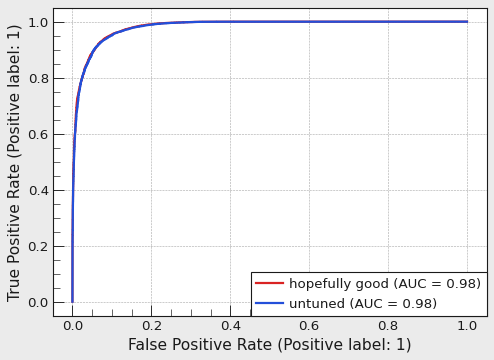

p_sigmad0 0.0118  +/- 0.0003
p_deltaEta1 0.0116  +/- 0.0002
p_deltaPhiRescaled2 0.0072  +/- 0.0002
p_ptconecoreTrackPtrCorrection 0.0069  +/- 0.0002
p_Rphi   0.0067  +/- 0.0002
p_Reta   0.0063  +/- 0.0002
p_ethad  0.0059  +/- 0.0002
p_nTracks 0.0039  +/- 0.0001
p_E7x11_Lr3 0.0039  +/- 0.0002
p_numberOfPixelHits 0.0037  +/- 0.0000
p_deltaPhiFromLastMeasurement 0.0037  +/- 0.0002
p_d0     0.0036  +/- 0.0000
p_ambiguityType 0.0035  +/- 0.0002
p_d0Sig  0.0035  +/- 0.0001
p_dPOverP 0.0033  +/- 0.0001
p_Rhad   0.0028  +/- 0.0002
p_numberOfSCTHits 0.0028  +/- 0.0001
p_numberOfInnermostPixelHits 0.0026  +/- 0.0001
p_EptRatio 0.0025  +/- 0.0001
p_Rhad1  0.0024  +/- 0.0001
p_E_Lr2_HiG 0.0020  +/- 0.0001
p_TRTPID 0.0018  +/- 0.0001
p_deltaPhi2 0.0018  +/- 0.0001
p_e2tsts1 0.0015  +/- 0.0001
NvtxReco 0.0015  +/- 0.0001
p_pt_track 0.0014  +/- 0.0001
p_Eratio 0.0014  +/- 0.0001
p_DeltaE 0.0014  +/- 0.0001
p_weta2  0.0013  +/- 0.0001
p_nCells_Lr2_HiG 0.0013  +/- 0.0001
p_nCells_Lr1_HiG 0.0013  +/- 0.

In [22]:
param_dict_range = {"min_child_samples": (100, 400), 
                    "num_leaves": (50,500)}

params2, imp_keys2 = optimize_tree_sk_classifier(train[imp_keys[:35]], train["Truth"].values, LGBMClassifier, param_dict_range, pre_process=preprocessing.StandardScaler())

In [23]:
with open("./top_25_lgbm.txt", "w") as f:
    f.write(str(imp_keys2[:25]))

In [61]:
param_dict_range = {"min_child_samples": (300, 600), 
                    "num_leaves": (50,300)}
# params25 = bayes_optimize_params_cv(train[imp_keys2[:25]], train["Truth"].values, LGBMClassifier, param_dict_range, rng = 42)
params15 = bayes_optimize_params_cv(train[imp_keys2[:15]], train["Truth"].values, LGBMClassifier, param_dict_range, rng = 42)

|   iter    |  target   | min_ch... | num_le... |
-------------------------------------------------
| 1         | 0.978     | 412.4     | 287.7     |
| 2         | 0.9781    | 519.6     | 199.7     |
| 3         | 0.9782    | 346.8     | 89.0      |
| 4         | 0.9778    | 317.4     | 266.5     |
| 5         | 0.9781    | 480.3     | 227.0     |
| 6         | 0.978     | 435.4     | 51.01     |
| 7         | 0.9782    | 348.4     | 89.21     |
| 8         | 0.9782    | 338.7     | 93.01     |
| 9         | 0.9782    | 342.5     | 80.42     |
| 10        | 0.9781    | 327.7     | 77.58     |
| 11        | 0.9781    | 343.8     | 64.77     |
| 12        | 0.978     | 326.5     | 53.93     |
| 13        | 0.9781    | 357.0     | 71.54     |
| 14        | 0.9781    | 311.2     | 89.53     |
| 15        | 0.9781    | 304.3     | 109.0     |
| 16        | 0.9781    | 301.9     | 73.99     |
| 17        | 0.9782    | 336.5     | 85.77     |
| 18        | 0.9782    | 594.2     | 56.76     |


In [60]:
firstparamssave = params15

In [ ]:
RandomizedSearchCV(LGBMClassifier)

In [51]:
# print("gbdt MinMax:", cross_val_score(LGBMClassifier(boosting_type="gbdt", **params25), preprocessing.MinMaxScaler().fit_transform(train[imp_keys2[:20]]) , train["Truth"].values, scoring="accuracy", cv = 5).mean())
# print("gbdt Standard:", cross_val_score(LGBMClassifier(boosting_type="gbdt", **params25), preprocessing.StandardScaler().fit_transform(train[imp_keys2[:15]]) , train["Truth"].values, scoring="accuracy", cv = 5).mean())
# print("gbdt 25:", cross_val_score(LGBMClassifier(boosting_type="gbdt", **params25), train[imp_keys2[:15]] , train["Truth"].values, scoring="roc_auc", cv = 5).mean())
print("gbdt 15:", cross_val_score(LGBMClassifier(boosting_type="gbdt", **params15), train[imp_keys2[:15]] , train["Truth"].values, scoring="roc_auc", cv = 5).mean())
# print("gbdt PCA:", cross_val_score(LGBMClassifier(boosting_type="gbdt"), KernelPCA(n_components=15, kernel='rbf').fit_transform(preprocessing.StandardScaler().fit_transform(train[imp_keys2[:15]][:10000])), train["Truth"][:10000].values, scoring="accuracy", cv = 5).mean())
# print(params25)

gbdt 15: 0.9781081573661276


[[-3.24442066e-02 -3.71603031e-03]
 [-3.23425944e-02  5.15558385e-05]
 [-3.85549951e-02 -1.34574071e-02]
 ...
 [-2.43698324e-02  4.44619997e-02]
 [ 3.12474836e-01 -8.08444622e-02]
 [-1.17971941e-02  1.22578610e-01]]


[]

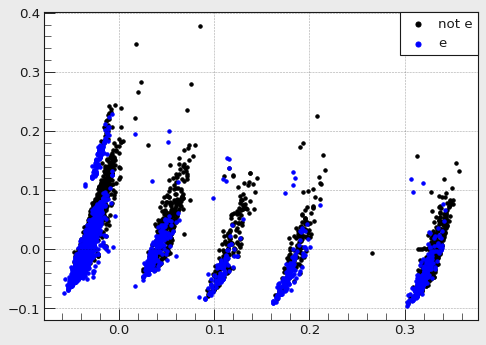

In [59]:
pca = KernelPCA(n_components=2, kernel='rbf').fit_transform(preprocessing.MinMaxScaler().fit_transform(train[imp_keys2[:15]][:10000]))
print(pca)
plt.scatter(*pca[train["Truth"][:10000].values==0].T, color = "k", label = "not e")
plt.scatter(*pca[train["Truth"][:10000].values==1].T, color = "b", label = "e")
plt.legend()
plt.plot()

In [56]:
print(pca.T)

[[-0.28965298 -0.25721647 -0.22209349 ...  0.00144804  0.41030644
   0.63007026]
 [ 0.13601403  0.26231584  0.12528629 ...  0.52894298 -0.15128063
  -0.11175687]]


In [43]:
print(params25, params15)

{'min_child_samples': 399, 'num_leaves': 95} {'min_child_samples': 169, 'num_leaves': 98}


In [36]:
print("gbdt None:", cross_val_score(LGBMClassifier(boosting_type="gbdt", **params25), train[imp_keys2[:15]] , train["Truth"].values, scoring="accuracy", cv = 5).mean())


gbdt None: 0.9427015384615384


{'max_depth': 158, 'min_child_samples': 45, 'num_leaves': 281}


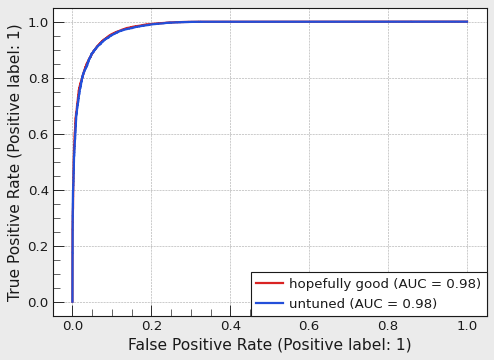

p_sigmad0 0.0226  +/- 0.0002
p_Rphi   0.0139  +/- 0.0000
p_ptconecoreTrackPtrCorrection 0.0119  +/- 0.0003
p_deltaPhiRescaled2 0.0116  +/- 0.0001
p_nTracks 0.0099  +/- 0.0002
p_Reta   0.0093  +/- 0.0001
p_d0     0.0083  +/- 0.0001
p_ambiguityType 0.0078  +/- 0.0001
p_deltaEta1 0.0076  +/- 0.0001
p_ethad  0.0057  +/- 0.0001
p_numberOfPixelHits 0.0057  +/- 0.0001
p_dPOverP 0.0057  +/- 0.0001
p_deltaPhiFromLastMeasurement 0.0056  +/- 0.0002
p_d0Sig  0.0054  +/- 0.0001
p_Rhad   0.0047  +/- 0.0002
p_numberOfInnermostPixelHits 0.0045  +/- 0.0001
p_numberOfSCTHits 0.0034  +/- 0.0001
p_EptRatio 0.0033  +/- 0.0001
p_TRTPID 0.0026  +/- 0.0001
NvtxReco 0.0026  +/- 0.0001
p_Rhad1  0.0025  +/- 0.0001
p_nCells_Lr2_HiG 0.0023  +/- 0.0000
p_deltaPhi2 0.0022  +/- 0.0001
p_pt_track 0.0021  +/- 0.0001
p_E7x11_Lr3 0.0020  +/- 0.0001
p_qOverP 0.0018  +/- 0.0000
p_weta2  0.0016  +/- 0.0001
p_E_Lr2_HiG 0.0016  +/- 0.0001
p_chi2   0.0014  +/- 0.0001
p_maxEcell_time 0.0014  +/- 0.0000
p_z0     0.0014  +/- 0.00

In [160]:
params2, imp_keys2 = optimize_tree_sk_classifier(train[imp_keys[:100]], train["Truth"].values, LGBMClassifier, param_dict_range, pre_process=preprocessing.StandardScaler())

In [182]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(preprocessing.StandardScaler().fit_transform(train[imp_keys2[15:]])), train["Truth"], test_size=0.2, random_state=4)
model = LGBMClassifier(**params2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9894076923076923
0.9360307692307692


In [174]:
with open("./second_lgbm_model.txt", "w") as f:
    f.write("Parameters used \n")
    f.write(str(imp_keys2[15:]) + "\n")
    f.write("Hyperparameters used \n")
    f.write(str(params2) + "\n")
    f.write("Evaluation on 0.2 \n")
    f.write(str(model.score(X_test, y_test)))

In [129]:
print(5000*160)

800000


In [109]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def DecisionTree_CrossValidation(max_depth, min_samples_leaf, num_leaves, data, targets):
    """Decision Tree cross validation.
       Fits a Decision Tree with the given paramaters to the target 
       given data, calculated a CV accuracy score and returns the mean.
       The goal is to find combinations of max_depth, min_samples_leaf 
       that maximize the accuracy
    """
    
    estimator = LGBMClassifier(random_state=42, 
                                       max_depth=max_depth, 
                                       min_samples_leaf=min_samples_leaf,
                                       num_leaves=num_leaves)
    
    cval = cross_val_score(estimator, data, targets, scoring='accuracy', cv=8)
    
    return cval.mean()

def optimize_DecisionTree(data, targets, pars, n_iter=5):
    """Apply Bayesian Optimization to Decision Tree parameters."""
    
    def crossval_wrapper(max_depth, min_samples_leaf, num_leaves):
        """Wrapper of Decision Tree cross validation. 
           Notice how we ensure max_depth, min_samples_leaf 
           are casted to integer before we pass them along.
        """
        return DecisionTree_CrossValidation(max_depth=int(max_depth), 
                                            min_samples_leaf=int(min_samples_leaf),
                                            num_leaves = int(num_leaves),
                                            data=data, 
                                            targets=targets)

    optimizer = BayesianOptimization(f=crossval_wrapper, 
                                     pbounds=pars, 
                                     random_state=42, 
                                     verbose=2)
    optimizer.maximize(init_points=8, n_iter=n_iter)

    return optimizer

In [21]:
parameters_BayesianOptimization = {"max_depth": (1, 100), 
                                   "min_samples_leaf": (1, 100),
                                   "num_leaves": (10,100)
                                  }
''
BayesianOptimization = optimize_DecisionTree(X_train_sub, 
                                             y_train_sub, 
                                             parameters_BayesianOptimization, 
                                             n_iter=5)
print(BayesianOptimization.max)

|   iter    |  target   | max_depth | min_sa... | num_le... |
-------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=95. Current value: min_data_in_leaf=95
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=95. Current value: min_data_in_leaf=95
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=95. Current value: min_data_in_leaf=95
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=95. Current value: min_data_in_leaf=95
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=95. Current value: min_data_in_leaf=95
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=95. Current val

In [22]:
params = BayesianOptimization.max["params"]
for param in params:
    params[param] = int(params[param])


In [27]:
model = LGBMClassifier(**params)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
0.9494384615384616
0.9421846153846154


In [28]:
model2 = LGBMClassifier()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.9528846153846153
0.9434153846153847


In [25]:
X_test_sub, y_test_sub = X_test[:2000], y_test[:2000]

In [ ]:

r = permutation_importance(model2, X_test_sub, y_test_sub, n_repeats=30, random_state=0)


In [32]:
important_keys = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{model.feature_name_[i]:<8}",
            f"{r.importances_mean[i]:.3f}",
            f" +/- {r.importances_std[i]:.3f}")
            important_keys.append(model.feature_name_[i])

p_ptconecoreTrackPtrCorrection 0.009  +/- 0.002
p_deltaEta1 0.008  +/- 0.002
p_sigmad0 0.007  +/- 0.003
p_Rhad   0.007  +/- 0.002
p_deltaPhiRescaled2 0.007  +/- 0.002
p_Rphi   0.004  +/- 0.002
p_Reta   0.004  +/- 0.002
p_ethad  0.004  +/- 0.002
p_qOverP 0.004  +/- 0.001
p_numberOfSCTHits 0.003  +/- 0.001
p_E7x11_Lr3 0.003  +/- 0.001
p_EptRatio 0.003  +/- 0.001
p_deltaPhi2 0.003  +/- 0.001
p_numberOfPixelHits 0.003  +/- 0.001
p_d0Sig  0.002  +/- 0.001
p_fracs1 0.002  +/- 0.001
p_E7x11_Lr2 0.001  +/- 0.001
p_ndof   0.001  +/- 0.000


In [42]:
train_corr = pd.concat([X_train, y_train], axis = 1).corr()
corr_keys = pd.concat([train_corr["Truth"][:-1].abs().rank(ascending=False), train_corr["Truth"][:-1]], axis = 1, keys = ["rank", "corr"]).sort_values(by = "rank").index[:15]


Index(['p_Reta', 'p_Rphi', 'p_Rhad', 'p_ehad1', 'p_Rhad1', 'p_ethad',
       'p_ethad1', 'p_weta2', 'p_r33over37allcalo', 'p_E7x11_Lr3', 'p_Eratio',
       'p_e2ts1', 'p_e2tsts1', 'p_E7x7_Lr3', 'p_E5x7_Lr3'],
      dtype='object')


In [48]:
X_train, X_test, y_train, y_test = train_test_split(train[important_keys[:15]], train["Truth"], test_size=0.2, random_state=42)

model2 = LGBMClassifier()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.9474307692307692
0.94


In [72]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(train[use_keys]), columns=use_keys)
X_train, X_test, y_train, y_test = train_test_split(X, train["Truth"], test_size=0.2, random_state=42)
X_train_sub = X_train.iloc[:5000]
y_train_sub = y_train.iloc[:5000]
X_test_sub = X_test.iloc[:10000]
y_test_sub = y_test.iloc[:10000]

In [69]:
model2 = LGBMClassifier()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.9527230769230769
0.9437538461538462


In [75]:

r = permutation_importance(model2, X_test_sub, y_test_sub, n_repeats=30, random_state=0)

In [80]:
important_keys3 = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{model.feature_name_[i]:<8}",
            f"{r.importances_mean[i]:.3f}",
            f" +/- {r.importances_std[i]:.3f}")
            important_keys3.append(model.feature_name_[i])

p_deltaEta1 0.009  +/- 0.001
p_sigmad0 0.007  +/- 0.001
p_ptconecoreTrackPtrCorrection 0.006  +/- 0.001
p_Reta   0.006  +/- 0.001
p_Rhad   0.004  +/- 0.001
p_deltaPhiRescaled2 0.004  +/- 0.001
p_ethad  0.003  +/- 0.001
p_numberOfPixelHits 0.003  +/- 0.000
p_ambiguityType 0.003  +/- 0.001
p_Rphi   0.002  +/- 0.001
p_d0Sig  0.002  +/- 0.001
p_numberOfInnermostPixelHits 0.002  +/- 0.001
p_numberOfSCTHits 0.001  +/- 0.001
p_d0     0.001  +/- 0.000
p_E7x11_Lr3 0.001  +/- 0.000
p_TRTPID 0.001  +/- 0.000
p_EptRatio 0.001  +/- 0.000
p_DeltaE 0.000  +/- 0.000
p_z0     0.000  +/- 0.000
p_f3core 0.000  +/- 0.000
p_maxEcell_energy 0.000  +/- 0.000
p_emins1 0.000  +/- 0.000


In [106]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(train[important_keys3[:15]]), columns=important_keys3[:15])
X_train, X_test, y_train, y_test = train_test_split(X, train["Truth"], test_size=0.2, random_state=42)
X_train_sub = X_train.iloc[:5000]
y_train_sub = y_train.iloc[:5000]
X_test_sub = X_test.iloc[:10000]
y_test_sub = y_test.iloc[:10000]

In [107]:
model2 = LGBMClassifier()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.9473846153846154
0.9392615384615385


In [111]:
parameters_BayesianOptimization = {"max_depth": (1, 100), 
                                   "min_samples_leaf": (1, 300),
                                   "num_leaves": (10,100)
                                  }
''
BayesianOptimization = optimize_DecisionTree(X_train, 
                                             y_train, 
                                             parameters_BayesianOptimization, 
                                             n_iter=5)
print(BayesianOptimization.max)

|   iter    |  target   | max_depth | min_sa... | num_le... |
-------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. 

In [112]:
params_3 = BayesianOptimization.max["params"]
for param in params:
    params_3[param] = int(params_3[param])

In [113]:
model2 = LGBMClassifier(**params_3)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=284. Current value: min_data_in_leaf=284
0.9528538461538462
0.9400615384615385


In [94]:
r = permutation_importance(model2, X_test, y_test, n_repeats=30, random_state=0)

In [95]:
important_keys4 = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{model2.feature_name_[i]:<8}",
            f"{r.importances_mean[i]:.3f}",
            f" +/- {r.importances_std[i]:.3f}")
            important_keys4.append(model2.feature_name_[i])

p_sigmad0 0.026  +/- 0.001
p_deltaEta1 0.021  +/- 0.001
p_ptconecoreTrackPtrCorrection 0.008  +/- 0.001
p_Rhad   0.007  +/- 0.001
p_Reta   0.006  +/- 0.001
p_Rphi   0.006  +/- 0.001
p_deltaPhiRescaled2 0.006  +/- 0.001
p_EptRatio 0.004  +/- 0.000
p_ethad  0.004  +/- 0.000
p_E7x11_Lr3 0.003  +/- 0.001
p_d0     0.003  +/- 0.000
p_ambiguityType 0.002  +/- 0.000
p_numberOfPixelHits 0.002  +/- 0.000
p_d0Sig  0.002  +/- 0.000
p_numberOfSCTHits 0.002  +/- 0.000
p_numberOfInnermostPixelHits 0.002  +/- 0.000
p_TRTPID 0.001  +/- 0.000
p_DeltaE 0.001  +/- 0.000
p_maxEcell_energy 0.001  +/- 0.000
p_emins1 0.001  +/- 0.000
p_f3core 0.001  +/- 0.000


In [97]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(train[important_keys4[:15]]), columns=important_keys4[:15])
X_train, X_test, y_train, y_test = train_test_split(X, train["Truth"], test_size=0.2, random_state=42)

In [98]:
model2 = LGBMClassifier()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.948
0.9402153846153846


In [102]:
parameters_BayesianOptimization = {"max_depth": (1, 100), 
                                   "min_samples_leaf": (1, 300),
                                   "num_leaves": (10,100)
                                  }
''
BayesianOptimization = optimize_DecisionTree(X_train, 
                                             y_train, 
                                             parameters_BayesianOptimization, 
                                             n_iter=10)
print(BayesianOptimization.max)

|   iter    |  target   | max_depth | min_sa... | num_le... |
-------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. 

In [103]:
params_3 = BayesianOptimization.max["params"]
for param in params:
    params_3[param] = int(params_3[param])

In [104]:
model2 = LGBMClassifier(**params_3)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=296. Current value: min_data_in_leaf=296
0.9559153846153846
0.9409538461538461


In [7]:
print(train.shape)
print(final_test.shape)

(162500, 166)
(160651, 164)


In [105]:
with open("./first_lgbm_model.txt", "w") as f:
    f.write("Parameters used \n")
    f.write(str(important_keys4[:15]) + "\n")
    f.write("Hyperparameters used \n")
    f.write(str(params_3) + "\n")
    f.write("Evaluation on 0.2 \n")
    f.write(str(model2.score(X_test, y_test)))